In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
google = pd.read_csv('../src/Data/googleplaystore.csv', index_col = 'App')

In [3]:
user_reviews = pd.read_csv('../src/Data/googleplaystore_user_reviews.csv')

In [4]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 12 columns):
Category          10840 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null int64
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10840 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 1.1+ MB


In [5]:
google

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up



- Rating
- Reviews
- Size (in kilobytes)
- Installs

###Cleaning Size Variable

In [6]:
'''
Cleans 
'''
def size_fix(data):
    if data.Size[-1] == 'M':
        return float(data.Size[:-1]) * 1000
    elif data.Size[-1] == 'k':
        return float(data.Size[:-1])

In [7]:
google.Size = google.apply(size_fix, axis = 1)
google.Size = google.Size.astype('float64')

###Cleaning Installs Variable

In [8]:
def installs_fix(data):
    if data.Installs == '0':
        return int(data.Installs)
    else:
        return int(data.Installs[:-1].replace(',',''))

In [9]:
google.Installs = google.apply(installs_fix, axis = 1)

###Cleaning Type Variable

In [10]:
google.iloc[9148, 5] = 'Free'

In [11]:
google.Type = google.Type.astype('category')

###Cleaning Price Variable

In [12]:
def price_fix(data):
    if data.Price == '0':
        return float(data.Price)
    else:
        return float(data.Price[1:])

In [13]:
google.Price = google.apply(price_fix, axis = 1)

###Cleaning Content Rating Variable

In [14]:
google['Content Rating'] = google['Content Rating'].astype('category')

###Cleaning Last Updated Variable

In [15]:
google['Last Updated'] = pd.to_datetime(google['Last Updated'], format = '%d-%b-%y')

###Cleaning Android Version Variable

In [16]:
def android_fix(data):
    if pd.isnull(data['Android Ver']):
        return None
    elif data['Android Ver'] == 'Varies with device':
        return None
    else: 
        return float(data['Android Ver'][0:3])

In [17]:
def android_na_fix(data):
    if pd.isnull(data['Android Ver']):
        return google['Android Ver'].mean()
    else:
        return data['Android Ver']

In [18]:
google['Android Ver'] = google.apply(android_fix, axis = 1 )

In [19]:
google['Android Ver'] = google.apply(android_na_fix, axis = 1)

In [20]:
google.drop('Current Ver', axis = 1,inplace = True)

###Cleaning NAs

In [21]:
def rating_na_fix(data):
    if pd.isnull(data.Rating):
        return google.Rating.mean()
    else:
        return data.Rating

In [22]:
def size_na_fix(data):
    if pd.isnull(data.Size):
        return google.Size.mean()
    else:
        return data.Size

In [23]:
google.Rating = google.apply(rating_na_fix, axis = 1)

In [24]:
google.Size = google.apply(size_na_fix, axis = 1)

In [25]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 11 columns):
Category          10840 non-null object
Rating            10841 non-null float64
Reviews           10841 non-null int64
Size              10841 non-null float64
Installs          10841 non-null int64
Type              10841 non-null category
Price             10841 non-null float64
Content Rating    10841 non-null category
Genres            10840 non-null object
Last Updated      10841 non-null datetime64[ns]
Android Ver       10841 non-null float64
dtypes: category(2), datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 868.4+ KB


In [26]:
google_visuals = google.copy()

###Coding Categorical Variables

In [27]:
from sklearn import preprocessing

In [28]:
google['Content Rating'].cat.categories

Index(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen',
       'Unrated'],
      dtype='object')

In [29]:
rating = preprocessing.LabelEncoder()
rating.fit(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+', 'Teen', 'Unrated'])

google['Content Rating'] = rating.transform(google['Content Rating'])

In [30]:
google.Type.cat.categories

Index(['Free', 'Paid'], dtype='object')

In [31]:
type_app = preprocessing.LabelEncoder()
type_app.fit(['Free', 'Paid']) 

google.Type = type_app.transform(google.Type)

##Adding User Reviews Data

In [32]:
sent_polar = user_reviews[['App', 'Sentiment_Polarity']].groupby('App').mean()

In [33]:
sent_polar.head(5)

,Sentiment_Polarity
App,
10 Best Foods for You,0.470733
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.392405
11st,0.181294
1800 Contacts - Lens Store,0.318145
1LINE – One Line with One Touch,0.196290


In [34]:
sent_sub = user_reviews[['App', 'Sentiment_Subjectivity']].groupby('App').mean()

In [35]:
google = google.merge(sent_polar, how = 'left', left_on = 'App', right_on = 'App')
google = google.merge(sent_sub, how = 'left', left_on = 'App', right_on = 'App')

In [36]:
google['Sentiment_Polarity'] = google['Sentiment_Polarity'].fillna(google['Sentiment_Polarity'].mean())
google['Sentiment_Subjectivity'] = google['Sentiment_Subjectivity'].fillna(google['Sentiment_Subjectivity'].mean())

###Getting Data ready for Machine Learning input

In [43]:
google.drop(['Category', 'Genres'], axis =1 , inplace = True)

In [44]:
google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 11 columns):
Rating                    10841 non-null float64
Reviews                   10841 non-null int64
Size                      10841 non-null float64
Installs                  10841 non-null int64
Type                      10841 non-null int32
Price                     10841 non-null float64
Content Rating            10841 non-null int32
Last Updated              10841 non-null datetime64[ns]
Android Ver               10841 non-null float64
Sentiment_Polarity        10841 non-null float64
Sentiment_Subjectivity    10841 non-null float64
dtypes: datetime64[ns](1), float64(6), int32(2), int64(2)
memory usage: 931.6+ KB


In [45]:
google.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19000.0,10000,0,0.0,1,2018-01-07,4.0,0.186432,0.493178
Coloring book moana,3.9,967,14000.0,500000,0,0.0,1,2018-01-15,4.0,0.152652,0.641540
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",4.7,87510,8700.0,5000000,0,0.0,1,2018-08-01,4.0,0.186432,0.493178
Sketch - Draw & Paint,4.5,215644,25000.0,50000000,0,0.0,4,2018-06-08,4.2,0.186432,0.493178
Pixel Draw - Number Art Coloring Book,4.3,967,2800.0,100000,0,0.0,1,2018-06-20,4.4,0.186432,0.493178


In [46]:
google.to_csv('Data/google_clean.csv')

#Data Visualization

In [41]:
google_visuals.head(5)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
App,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,4.0
Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,4.0
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,4.0
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,4.2
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,4.4


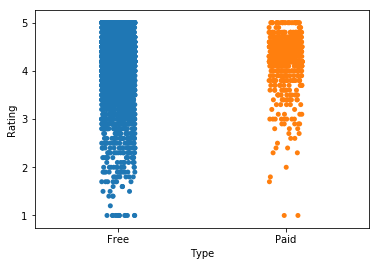

In [42]:
plt.figure()
sns.stripplot(x = 'Type', y = 'Rating', data = google_visuals)
plt.show()